# Integrantes

Numero de Cuenta-Nombre

20211021557-Erick Josue Sosa Aleman 

20221001175-Jose Francisco Vargas Carrasco

In [ ]:
import pandas as pd
import random 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm



# Leer Dataset

In [3]:
#Enlace del dataset original
#https://www.kaggle.com/datasets/anandshaw2001/customer-churn-dataset

dataset=pd.read_csv("Dataset/Churn_Modelling.csv")

dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Limpieza de Datos


Eliminar la columna RowNumber que es Redundante al ya tener CustomerID

In [4]:
#Eliminamos una columna redundante que es el RowNumber
df=dataset.drop(columns=['RowNumber'])
df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Analizar Tipos de Datos 

In [5]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

El nombre de las columnas es claro y estandarizado por ende no es necesario un renombramiento

# Descripcion y Clasificacion de 

- **CustomerId**: Identificador único del cliente (tipo: int64).
- **Surname**: Apellido(Sobrenombre) del cliente (tipo: object).
- **CreditScore**: Puntuación de crédito del cliente (tipo: int64).
- **Geography**: País de residencia del cliente (tipo: object).
- **Gender**: Género del cliente (tipo: object).
- **Age**: Edad del cliente (tipo: int64).
- **Tenure**: Tiempo en años que el cliente ha estado con la empresa (tipo: int64).
- **Balance**: Saldo de la cuenta del cliente (tipo: float64).
- **NumOfProducts**: Número de productos que el cliente tiene con la empresa (tipo: int64).
- **HasCrCard**: Indica si el cliente tiene tarjeta de crédito (tipo: int64).
- **IsActiveMember**: Indica si el cliente es un miembro activo (tipo: int64).
- **EstimatedSalary**: Salario estimado del cliente (tipo: float64).
- **Exited**: Indica si el cliente ha dejado la empresa (tipo: int64).


| Numericas       | Categoricas   | Otras     |
| --------------- | ------------- | --------- |
| CreditScore     | Geography     | CustomerID|
| Age             | Gender        | Surname   |
| Tenure          | HasCrCard     |           |
| Balance         | IsActiveMember|           |
| NumOfProducts   | Exited        |           |
| EstimatedSalary |               |           |

# Comparacion entre el dataset original y el dataset simulado

Paleta de Colores

-Verde claro: #86bf91

-Azul: #4A90E2

-Amarillo: #FFD700

-Rojo: #FF0000

-Naranja: #FFA500

-Morado: #800080

-Rosa: #FFC0CB

In [9]:
#El nombre del dataset simulado es df_simulado 
df_simulado=df

## Comparacion entre edades

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

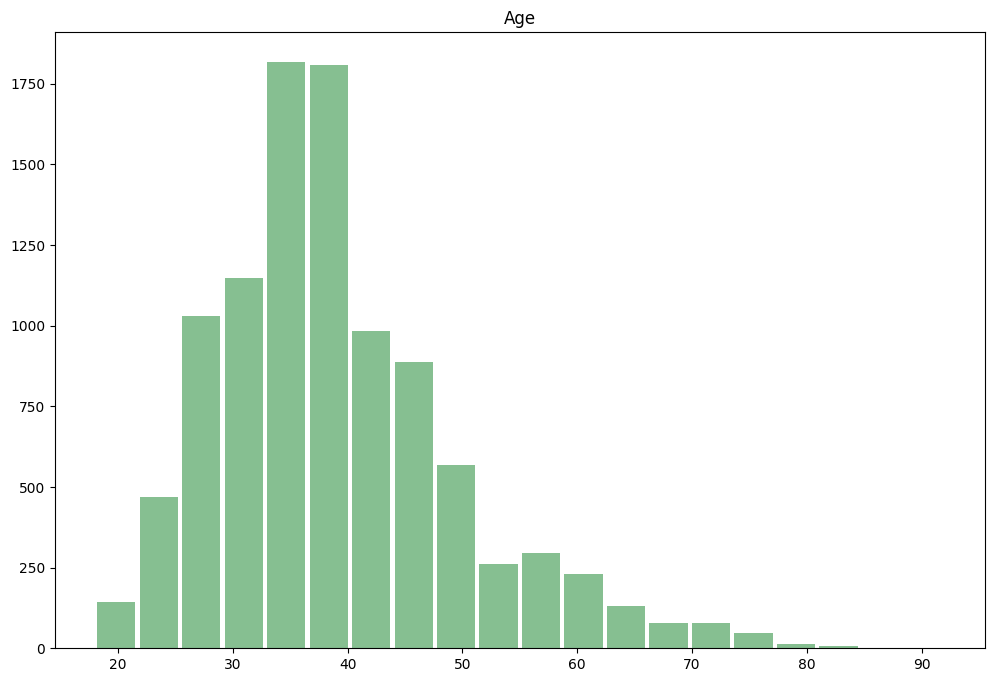

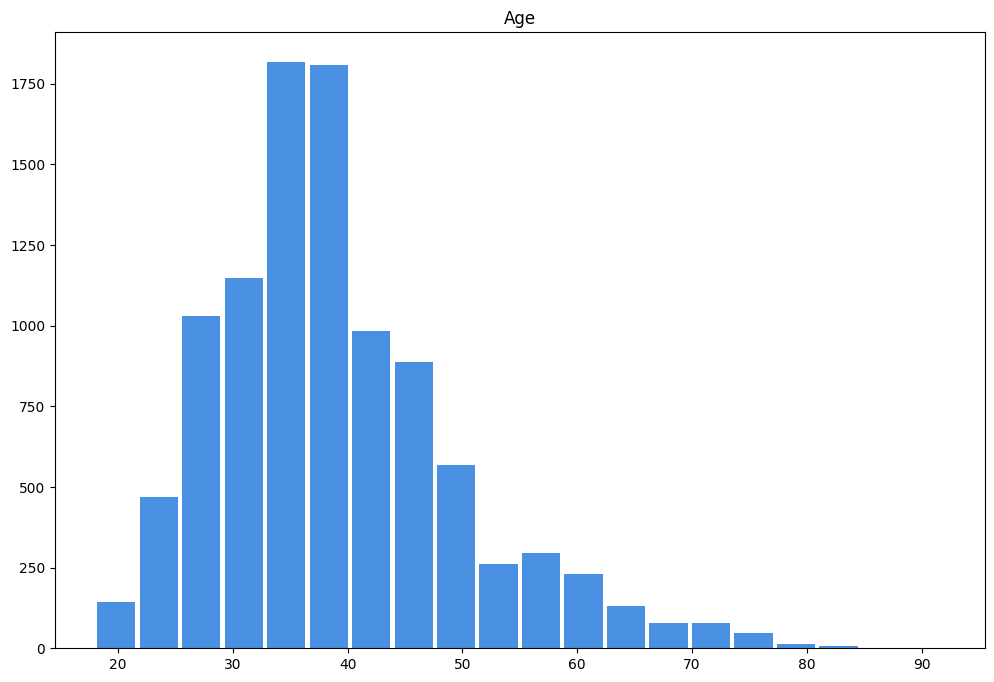

In [12]:
df.hist(column='Age', bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df_simulado.hist(column='Age', bins=20, grid=False, figsize=(12,8), color='#4A90E2', zorder=2, rwidth=0.9)

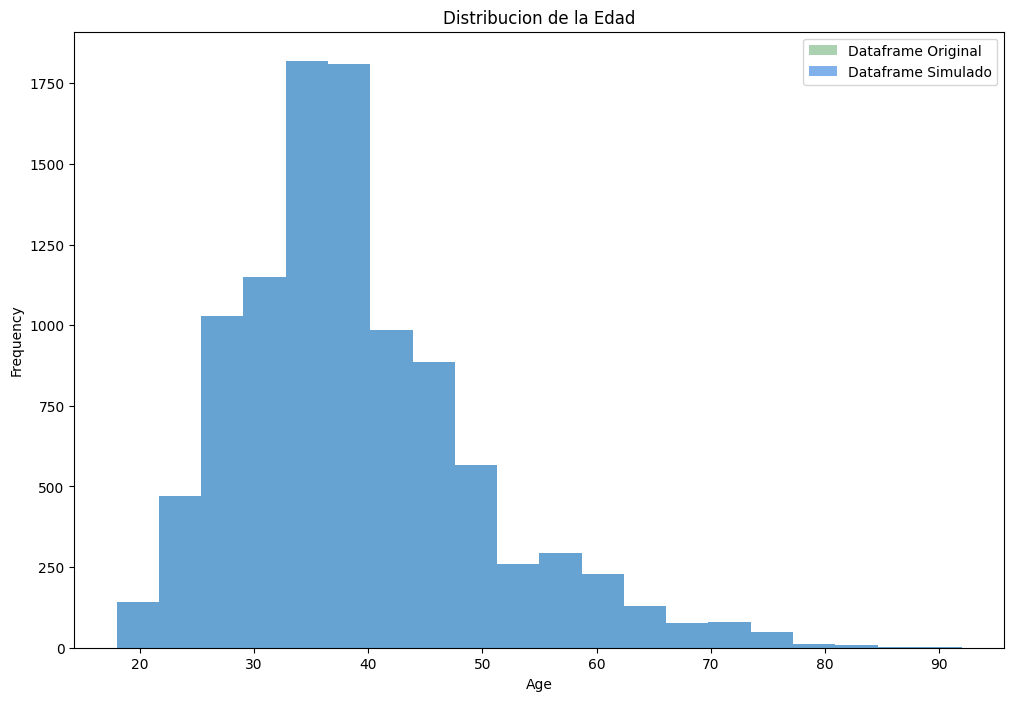

In [ ]:
# Graficando los histogramas juntos
plt.figure(figsize=(12,8))
plt.hist(df['Age'], bins=20, color='#86bf91', alpha=0.7, label='Dataframe Original')
plt.hist(df_simulado['Age' ], bins=20, color='#4A90E2', alpha=0.7, label='Dataframe Simulado')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribucion de la Edad')
plt.legend()
plt.show()

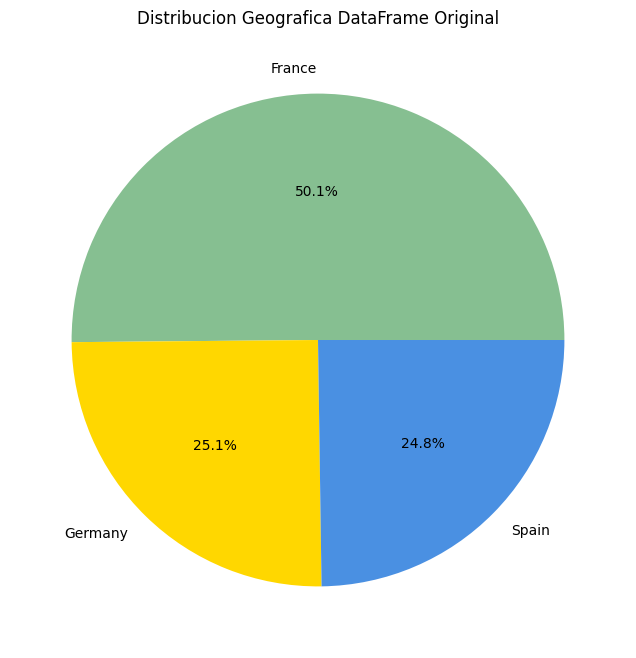

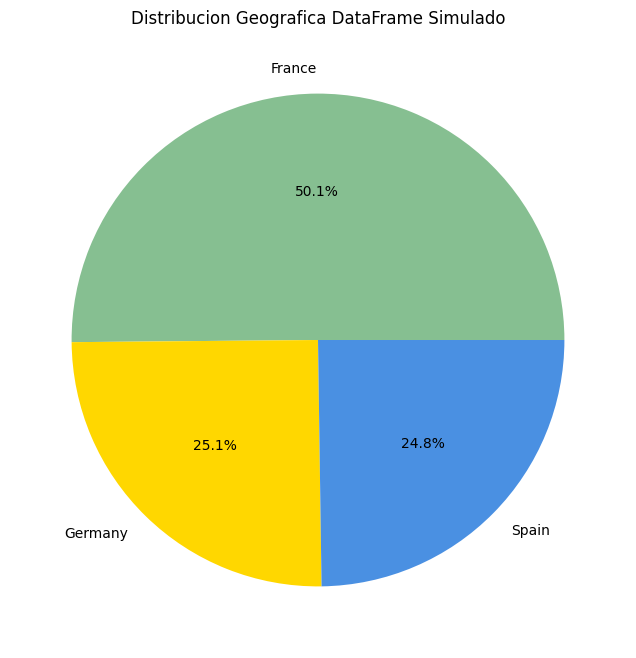

In [58]:
# Contar la frecuencia de cada ubicación geográfica en df
geography_counts_df = df['Geography'].value_counts()

# Contar la frecuencia de cada ubicación geográfica en df_simulado
geography_counts_df_simulado = df_simulado['Geography'].value_counts()

# Definir colores específicos para cada ubicación geográfica
colors = {
    'France': '#86bf91', 
    'Spain': '#4A90E2',   
    'Germany': '#FFD700'   
}

# Asignar colores a las ubicaciones geográficas en el gráfico de pastel para df
color_list_df = [colors.get(geo) for geo in geography_counts_df.index]

# Asignar colores a las ubicaciones geográficas en el gráfico de pastel para df_simulado
color_list_df_simulado = [colors.get(geo) for geo in geography_counts_df_simulado.index]

# Crear el pie chart para df
plt.figure(figsize=(8,8))
plt.pie(geography_counts_df,
        labels=geography_counts_df.index,
        autopct='%1.1f%%',
        colors=color_list_df)
plt.title('Distribucion Geografica DataFrame Original')
plt.show()

# Crear el pie chart para df_simulado
plt.figure(figsize=(8,8))
plt.pie(geography_counts_df_simulado,
        labels=geography_counts_df_simulado.index,
        autopct='%1.1f%%',
        colors=color_list_df_simulado)
plt.title('Distribucion Geografica DataFrame Simulado')

#Mostrar el Grafico
plt.show()